In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statistics import NormalDist

In [31]:
df = sns.load_dataset("mpg").dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [33]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [34]:
df.origin.value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [35]:
df.origin.value_counts(normalize=True)

origin
usa       0.625000
japan     0.201531
europe    0.173469
Name: proportion, dtype: float64

In [36]:
# con .agg puedo ir armando diferentes columnas con diferentes funciones que quiero ir calculando → nombre_columna = (columna, función)

df.groupby("origin").agg(
                         media_peso = ("weight", "mean"), 
                         mediana_peso = ("weight", "median"), 
                         desvio_peso = ("weight", "std"), 
                         pesos_unicos = ("weight", "nunique"), 
                         peso_maximo = ("weight", "max"), 
                         peso_minimo = ("weight", "min")
                         )
                        

,media_peso,mediana_peso,desvio_peso,pesos_unicos,peso_maximo,peso_minimo
origin,,,,,,
europe,2433.470588,2240.0,491.813867,64,3820,1825
japan,2221.227848,2155.0,320.497248,70,2930,1613
usa,3372.489796,3381.0,795.346690,230,5140,1800


In [41]:
df[df["origin"] == "usa"].describe()["weight"]

count     245.000000
mean     3372.489796
std       795.346690
min      1800.000000
25%      2720.000000
50%      3381.000000
75%      4055.000000
max      5140.000000
Name: weight, dtype: float64

<Axes: xlabel='weight', ylabel='Count'>

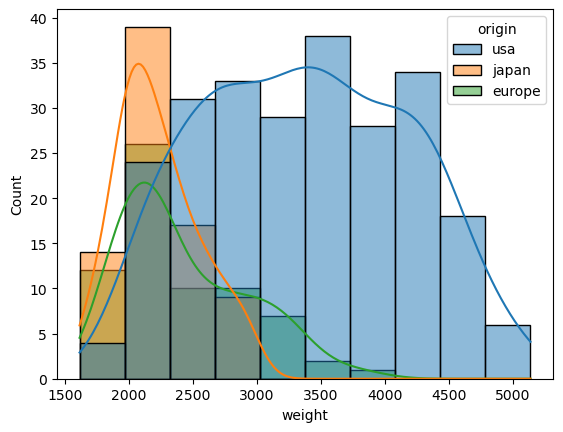

In [60]:
sns.histplot(x=df["weight"], kde=True, hue=df["origin"],fill=True)

In [64]:
# Con .apply(lambda x: round(x)) redondeo los valores de la columna weight en este caso

df.weight.describe().apply(lambda x: round(x)) 

count     392
mean     2978
std       849
min      1613
25%      2225
50%      2804
75%      3615
max      5140
Name: weight, dtype: int64

___

# ¿Poder causa más peso? ¿Autos más “poderosos” son más pesados? ¿Cuál es la relación entre peso y poder?

<Axes: xlabel='horsepower', ylabel='weight'>

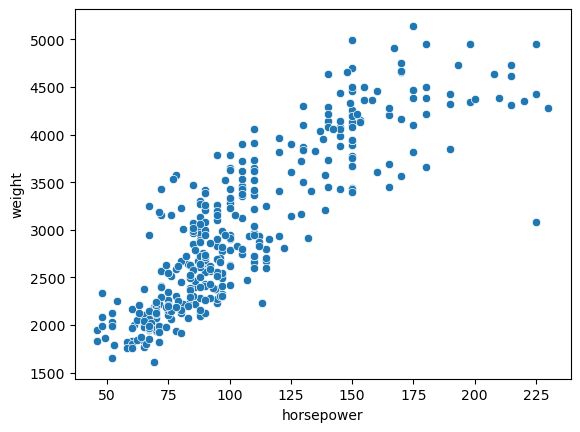

In [63]:
sns.scatterplot(x ="horsepower", y ="weight", data=df)

### → A medida que sube el horsepower, el peso también lo hace.
### → Y = mx + b (hay una fórmula en los datos que en este caso es una línea)